# Sequential Dense
---

## 00. Imports

In [1]:
import os
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid")

In [2]:
import sys
sys.path.append("../")

In [3]:
from src.activation.relu import ReluLayer
from src.layers.dense import DenseLayer
from src.model.sequential import SequentialModel
from src.utils.core import convert_categorical2one_hot

## 01. Settings

In [4]:
# number of samples in the data set
N_SAMPLES = 2000
# number of classes
N_CLASSES = 4
# number of features
N_FEATURES = 2
# ratio between training and test sets
TEST_SIZE = 0.1

## 02. Supporting functions

In [5]:
# the function making up the graph of a dataset
def make_plot(X, y, plot_name, file_name=None, XX=None, YY=None, preds=None, dark=False):
    if (dark):
        plt.style.use('dark_background')
    else:
        sns.set_style("whitegrid")
    plt.figure(figsize=(16,12))
    axes = plt.gca()
    axes.set(xlabel="$X_1$", ylabel="$X_2$")
    plt.title(plot_name, fontsize=30)
    plt.subplots_adjust(left=0.20)
    plt.subplots_adjust(right=0.80)
    if(XX is not None and YY is not None and preds is not None):
        plt.contourf(XX, YY, preds.reshape(XX.shape), 25, alpha = 1, cmap=cm.Spectral)
        plt.contour(XX, YY, preds.reshape(XX.shape), levels=[.5], cmap="Greys", vmin=0, vmax=.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')
    if(file_name):
        plt.savefig(file_name)
        plt.close()

## 03. Build data set

In [12]:
X, y = make_blobs(
    n_samples = N_SAMPLES,
    n_features = N_FEATURES,
    centers = N_CLASSES,
    cluster_std = 3,
    random_state=100
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)
y_train = convert_categorical2one_hot(y_train)
y_test = convert_categorical2one_hot(y_test)

print(f"X shape: {X.shape}, y: {y.shape}")

X shape: (2000, 2), y: (2000,)


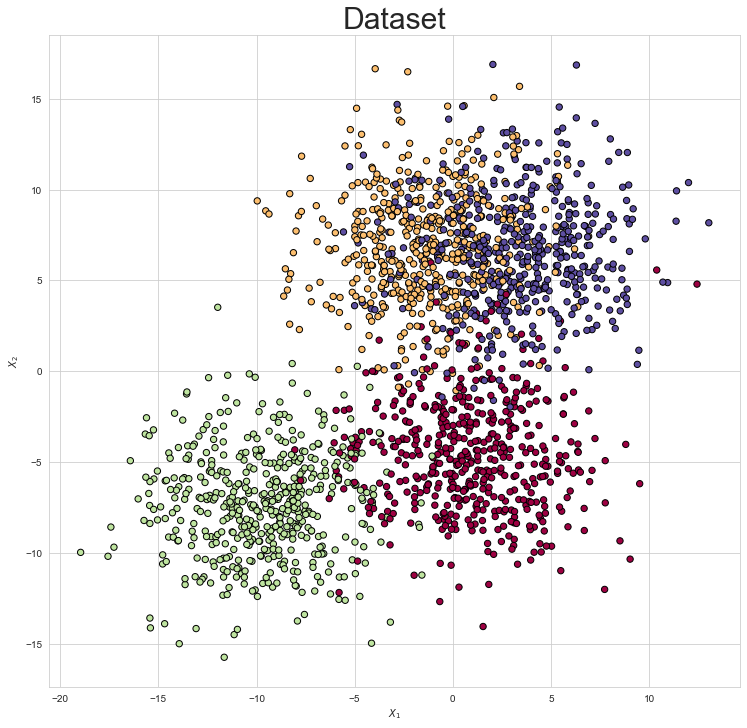

In [13]:
make_plot(X, y, "Dataset")

## 04. Build model

In [8]:
layers = [
    DenseLayer.initialize(input_dim=N_FEATURES, output_dim=25),
    ReluLayer(),
    DenseLayer.initialize(input_dim=25, output_dim=50),
    ReluLayer(),
    DenseLayer.initialize(input_dim=50, output_dim=50),
    ReluLayer(),
    DenseLayer.initialize(input_dim=50, output_dim=50),
    ReluLayer(),
    DenseLayer.initialize(input_dim=50, output_dim=25),
    ReluLayer(),
    DenseLayer.initialize(input_dim=25, output_dim=N_CLASSES)
]

model = SequentialModel(layers=layers)

In [9]:
model.train(
    X=np.transpose(X_train), 
    y=np.transpose(y_train), 
    epochs=20000, 
    lr=0.005
)

X_shape (2, 1800)
y_shape (4, 1800)
Iteration: 00000 - cost: 9.14778 - accuracy: 0.34375
Iteration: 01000 - cost: 1.27024 - accuracy: 0.60938
Iteration: 02000 - cost: 0.16489 - accuracy: 0.76562
Iteration: 03000 - cost: 0.00000 - accuracy: 1.00000
Iteration: 04000 - cost: 0.00000 - accuracy: 1.00000
Iteration: 05000 - cost: 0.00000 - accuracy: 1.00000
Iteration: 06000 - cost: 0.00000 - accuracy: 0.98438
Iteration: 07000 - cost: 0.00000 - accuracy: 1.00000
Iteration: 08000 - cost: 0.00000 - accuracy: 1.00000
Iteration: 09000 - cost: 0.00000 - accuracy: 1.00000
Iteration: 10000 - cost: 0.00000 - accuracy: 1.00000
Iteration: 11000 - cost: 0.00000 - accuracy: 1.00000
Iteration: 12000 - cost: 0.00000 - accuracy: 1.00000
Iteration: 13000 - cost: 0.00000 - accuracy: 0.98438
Iteration: 14000 - cost: 0.00000 - accuracy: 1.00000
Iteration: 15000 - cost: 0.00000 - accuracy: 1.00000
Iteration: 16000 - cost: 0.00000 - accuracy: 1.00000
Iteration: 17000 - cost: 0.00000 - accuracy: 1.00000
Iteration: